In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("mltest")
library("mltest")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpIZ47JQ\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpIZ47JQ\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpIZ47JQ\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpIZ47JQ\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'mltest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpIZ47JQ\downloaded_packages


In [2]:
ionomics <- read.csv('geneva_z_transformed.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:201,]
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 1

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
    1     2     3     4     5     6     7     8 
0.075 0.050 0.125 0.125 0.050 0.375 0.175 0.025 

Group means:
          B11       Na23       Mg26        Al27        P31         S34
1 -0.02963195  1.4210515 -0.1939047  0.48643404 -0.3644108 -0.47498382
2 -0.46041760 -1.2456772 -0.2894536 -0.58132392 -0.8394436 -0.67817602
3 -0.58289360 -0.6557355 -0.6301994  0.04565048  0.3398555  1.52429836
4 -0.23455798 -0.1261296  0.9280087  0.66048398 -0.1157965 -0.11791288
5 -1.83797800  0.8020282 -0.7398250  0.03113600  2.3569723 -0.30890687
6  0.48147190 -0.1992776 -0.1374929  0.09103777  0.1172385  0.09536537
7  0.25543022 -0.1821201  0.3672244 -0.49219866 -0.4107839 -1.09989931
8 -0.67476076 -0.3869477  0.7801425  0.41923517 -0.6673306  1.37006530
          K39        Ca44        Fe54        Mn55       Co59        Ni60
1 -0.31106910  0.09822832 -0.67074167  0.58504674  0.1993141 -0.22774030
2 -0.74810931 -0.05845700

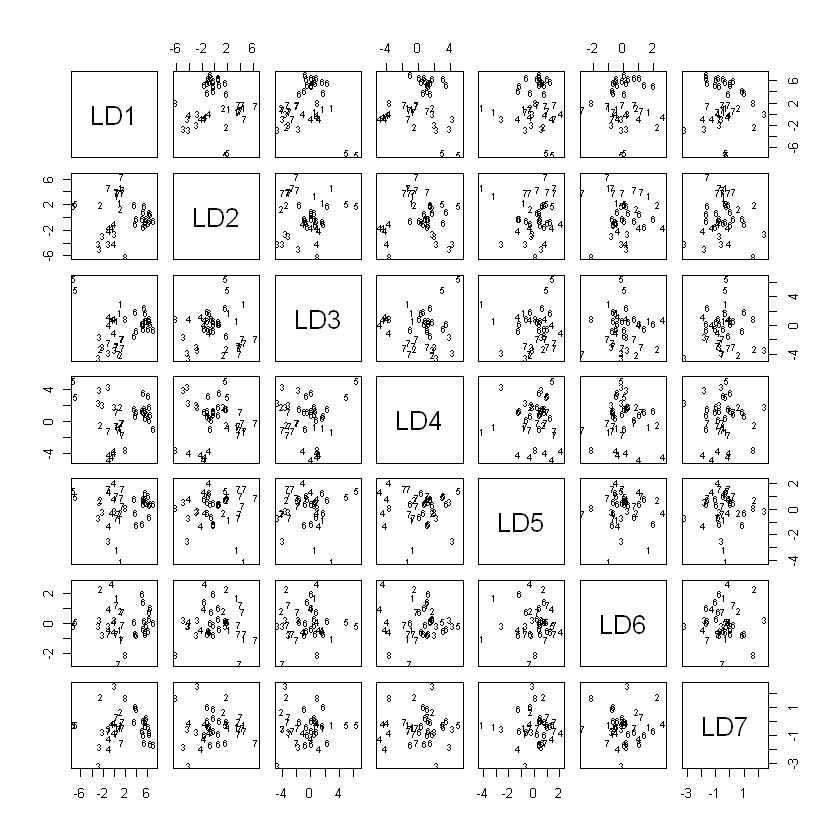

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 1 1 2 2 3
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
1,1.000000e+00,1.338982e-18,4.843452e-31,4.321164e-18,3.172218e-30,6.162348e-15,3.036664e-11,8.480817e-32
7,9.999480e-01,6.800381e-09,6.736337e-17,2.843780e-07,1.599616e-23,2.748107e-06,4.895827e-05,8.243722e-19
9,9.999973e-01,2.190365e-08,9.883807e-20,2.100353e-12,4.371816e-28,2.365292e-11,2.666611e-06,8.472369e-29
14,7.046589e-11,9.976594e-01,1.572911e-07,6.634639e-15,1.888852e-37,5.551645e-08,2.340368e-03,5.185163e-26
15,2.446757e-12,9.999771e-01,2.686833e-11,1.675556e-11,1.371800e-28,1.440505e-18,2.293559e-05,2.267500e-28
23,3.690836e-25,1.227743e-12,1.000000e+00,1.698157e-21,5.035845e-39,7.306661e-19,5.717598e-23,2.805641e-24


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
1,-0.5061221,4.290574,3.418711,-1.5805436,-4.2224055,-1.0561552,0.148658909
7,-0.7345662,1.915952,2.153905,-1.1465532,-0.9204993,-0.5149736,-0.051381379
9,-1.2620384,3.118165,1.077867,-0.9433994,-3.2805671,1.6356880,-0.002604611


In [7]:
table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
print(confusionMatrix(table))))

ERROR: Error in parse(text = x, srcfile = src): <text>:2:30: unexpected ')'
1: table <- table(Predicted=predictions$class, Species=test.data$spec_as_int)
2: print(confusionMatrix(table)))
                                ^


In [8]:
spec.af <- factor(test.data$spec_as_int, levels = c("1","2","3","4","5","6","7","8"))
class.af <- factor(predictions$class, levels = c("1","2","3","4","5","6","7","8"))

In [9]:
classifier_metrics <- ml_test(class.af, spec.af, output.as.table = TRUE)
F1 <- classifier_metrics$F1
accuracy <- classifier_metrics$accuracy

In [10]:
classifier_metrics

,balanced.accuracy,DOR,F0.5,F1,F2,FDR,FNR,FOR,FPR,geometric.mean,...,L,lambda,MCC,MK,NPV,OP,precision,recall,specificity,Youden
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
2,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
3,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
4,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
5,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
6,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
7,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
8,1,Inf,1,1,1,0,0,0,0,1,...,Inf,0,1,1,1,1,1,1,1,1
